<h1>Analyzing covid-19 situation in Czechia, Germany, France, Italy and Sweden month by month with government restrictions</h1>
<p>I will use modified dataset from previous part, do some exploratory data analysis along the way and finally, make comparisons in every month of 2020 among mentioned countries.<br>
I will use data from the Covid-19_Government_Restrictions.pfd file and connect restrictions to covid situation in every month in those 5 countries.</p>


In [2]:
library(tidyverse)
#install.packages("zoo")
library(zoo)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [4]:
data <- read.csv("updated_dataset.csv")
print(as_tibble(data))
summary(data)

# A tibble: 1,715 x 6
   dateRep    cases deaths country popData2019 cumulative_14d_cases
   <chr>      <int>  <int> <chr>         <int>                <dbl>
 1 7/12/2020   2654     87 Czechia    10649800                 512.
 2 6/12/2020   1773     77 Czechia    10649800                 502.
 3 5/12/2020   4743     97 Czechia    10649800                 515.
 4 4/12/2020   4621    126 Czechia    10649800                 525.
 5 3/12/2020   4568    108 Czechia    10649800                 542.
 6 2/12/2020   5176    112 Czechia    10649800                 551.
 7 1/12/2020   3575    157 Czechia    10649800                 542.
 8 30/11/2020  1074     84 Czechia    10649800                 560.
 9 29/11/2020  2665     87 Czechia    10649800                 567.
10 28/11/2020  4464    188 Czechia    10649800                 582.
# … with 1,705 more rows


   dateRep              cases           deaths          country         
 Length:1715        Min.   : -766   Min.   : -31.00   Length:1715       
 Class :character   1st Qu.:   78   1st Qu.:   1.00   Class :character  
 Mode  :character   Median :  509   Median :  10.00   Mode  :character  
                    Mean   : 3516   Mean   :  87.53                     
                    3rd Qu.: 2574   3rd Qu.:  74.00                     
                    Max.   :86852   Max.   :2004.00                     
                                                                        
  popData2019       cumulative_14d_cases
 Min.   :10230185   Min.   :   0.000    
 1st Qu.:10649800   1st Qu.:   6.869    
 Median :60359546   Median :  26.597    
 Mean   :46254325   Mean   : 123.812    
 3rd Qu.:67012883   3rd Qu.:  84.742    
 Max.   :83019213   Max.   :1594.406    
                    NA's   :65          

<p>As we can observe, there are some mistakes in the dataset. New cases and deaths can not be negative. I will be plotting data for each month, so incorrect values will be easy to detect. Once detected, I will replace incorrect values by correct ones.<br>
 I am also adding one additional column to the dataset. The column is month and will be extracted from date column.<br>
Month column will be helpful in plotting each month separately.<br>
I will also reverse rows of the whole dataset in order to have dates in increasing order.</p>

In [9]:
#data$month <- format(as.Date(data$dateRep), "%m")
#data
#na.locf(data, fromLast = TRUE)
#data
data <- data[order(nrow(data):1),]
data



,dateRep,cases,deaths,country,popData2019,cumulative_14d_cases,month
,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<chr>
1715,31/12/2019,0,0,Sweden,10230185,NA,12
1714,1/1/2020,0,0,Sweden,10230185,NA,01
1713,2/1/2020,0,0,Sweden,10230185,NA,01
1712,3/1/2020,0,0,Sweden,10230185,NA,01
1711,4/1/2020,0,0,Sweden,10230185,NA,01
1710,5/1/2020,0,0,Sweden,10230185,NA,01
1709,6/1/2020,0,0,Sweden,10230185,NA,01
1708,7/1/2020,0,0,Sweden,10230185,NA,01
1707,8/1/2020,0,0,Sweden,10230185,NA,01


<p>Here, I will hardcode data for each country and each month, it will be easier to prepare the data for plotting now.<br>
Also, ID column will be added. This will allow to display just the day for each month for plotting in an easier way. ID columns holds extracted day from date column for each month.</p>

In [11]:
CzechiaJan <- filter(data, country=="Czechia", month=="01")
CzechiaJan <- tibble::rowid_to_column(CzechiaJan, "ID")
CzechiaFeb <- filter(data, country=="Czechia", month=="02")
CzechiaFeb <- tibble::rowid_to_column(CzechiaFeb, "ID")
CzechiaMar <- filter(data, country=="Czechia", month=="03")
CzechiaMar <- tibble::rowid_to_column(CzechiaMar, "ID")
CzechiaApr <- filter(data, country=="Czechia", month=="04")
CzechiaApr <- tibble::rowid_to_column(CzechiaApr, "ID")
CzechiaMay <- filter(data, country=="Czechia", month=="05")
CzechiaMay <- tibble::rowid_to_column(CzechiaMay, "ID")
CzechiaJun <- filter(data, country=="Czechia", month=="06")
CzechiaJun <- tibble::rowid_to_column(CzechiaJun, "ID")
CzechiaJul <- filter(data, country=="Czechia", month=="07")
CzechiaJul <- tibble::rowid_to_column(CzechiaJul, "ID")
CzechiaAug <- filter(data, country=="Czechia", month=="08")
CzechiaAug <- tibble::rowid_to_column(CzechiaAug, "ID")
CzechiaSep <- filter(data, country=="Czechia", month=="09")
CzechiaSep <- tibble::rowid_to_column(CzechiaSep, "ID")
CzechiaOct <- filter(data, country=="Czechia", month=="10")
CzechiaOct <- tibble::rowid_to_column(CzechiaOct, "ID")
CzechiaNov <- filter(data, country=="Czechia", month=="11")
CzechiaNov <- tibble::rowid_to_column(CzechiaNov, "ID")
CzechiaDec <- filter(data, country=="Czechia", month=="12")
CzechiaDec <- tibble::rowid_to_column(CzechiaDec, "ID")

GermanyJan <- filter(data, country=="Germany", month=="01")
GermanyJan <- tibble::rowid_to_column(GermanyJan, "ID")
GermanyFeb <- filter(data, country=="Germany", month=="02")
GermanyFeb <- tibble::rowid_to_column(GermanyFeb, "ID")
GermanyMar <- filter(data, country=="Germany", month=="03")
GermanyMar <- tibble::rowid_to_column(GermanyMar, "ID")
GermanyApr <- filter(data, country=="Germany", month=="04")
GermanyApr <- tibble::rowid_to_column(GermanyApr, "ID")
GermanyMay <- filter(data, country=="Germany", month=="05")
GermanyMay <- tibble::rowid_to_column(GermanyMay, "ID")
GermanyJun <- filter(data, country=="Germany", month=="06")
GermanyJun <- tibble::rowid_to_column(GermanyJun, "ID")
GermanyJul <- filter(data, country=="Germany", month=="07")
GermanyJul <- tibble::rowid_to_column(GermanyJul, "ID")
GermanyAug <- filter(data, country=="Germany", month=="08")
GermanyAug <- tibble::rowid_to_column(GermanyAug, "ID")
GermanySep <- filter(data, country=="Germany", month=="09")
GermanySep <- tibble::rowid_to_column(GermanySep, "ID")
GermanyOct <- filter(data, country=="Germany", month=="10")
GermanyOct <- tibble::rowid_to_column(GermanyOct, "ID")
GermanyNov <- filter(data, country=="Germany", month=="11")
GermanyNov <- tibble::rowid_to_column(GermanyNov, "ID")
GermanyDec <- filter(data, country=="Germany", month=="12")
GermanyDec <- tibble::rowid_to_column(GermanyDec, "ID")

FranceJan <- filter(data, country=="France", month=="01")
FranceJan <- tibble::rowid_to_column(FranceJan, "ID")
FranceFeb <- filter(data, country=="France", month=="02")
FranceFeb <- tibble::rowid_to_column(FranceFeb, "ID")
FranceMar <- filter(data, country=="France", month=="03")
FranceMar <- tibble::rowid_to_column(FranceMar, "ID")
FranceApr <- filter(data, country=="France", month=="04")
FranceApr <- tibble::rowid_to_column(FranceApr, "ID")
FranceMay <- filter(data, country=="France", month=="05")
FranceMay <- tibble::rowid_to_column(FranceMay, "ID")
FranceJun <- filter(data, country=="France", month=="06")
FranceJun <- tibble::rowid_to_column(FranceJun, "ID")
FranceJul <- filter(data, country=="France", month=="07")
FranceJul <- tibble::rowid_to_column(FranceJul, "ID")
FranceAug <- filter(data, country=="France", month=="08")
FranceAug <- tibble::rowid_to_column(FranceAug, "ID")
FranceSep <- filter(data, country=="France", month=="09")
FranceSep <- tibble::rowid_to_column(FranceSep, "ID")
FranceOct <- filter(data, country=="France", month=="10")
FranceOct <- tibble::rowid_to_column(FranceOct, "ID")
FranceNov <- filter(data, country=="France", month=="11")
FranceNov <- tibble::rowid_to_column(FranceNov, "ID")
FranceDec <- filter(data, country=="France", month=="12")
FranceDec <- tibble::rowid_to_column(FranceDec, "ID")

ItalyJan <- filter(data, country=="Italy", month=="01")
ItalyJan <- tibble::rowid_to_column(ItalyJan, "ID")
ItalyFeb <- filter(data, country=="Italy", month=="02")
ItalyFeb <- tibble::rowid_to_column(ItalyFeb, "ID")
ItalyMar <- filter(data, country=="Italy", month=="03")
ItalyMar <- tibble::rowid_to_column(ItalyMar, "ID")
ItalyApr <- filter(data, country=="Italy", month=="04")
ItalyApr <- tibble::rowid_to_column(ItalyApr, "ID")
ItalyMay <- filter(data, country=="Italy", month=="05")
ItalyMay <- tibble::rowid_to_column(ItalyMay, "ID")
ItalyJun <- filter(data, country=="Italy", month=="06")
ItalyJun <- tibble::rowid_to_column(ItalyJun, "ID")
ItalyJul <- filter(data, country=="Italy", month=="07")
ItalyJul <- tibble::rowid_to_column(ItalyJul, "ID")
ItalyAug <- filter(data, country=="Italy", month=="08")
ItalyAug <- tibble::rowid_to_column(ItalyAug, "ID")
ItalySep <- filter(data, country=="Italy", month=="09")
ItalySep <- tibble::rowid_to_column(ItalySep, "ID")
ItalyOct <- filter(data, country=="Italy", month=="10")
ItalyOct <- tibble::rowid_to_column(ItalyOct, "ID")
ItalyNov <- filter(data, country=="Italy", month=="11")
ItalyNov <- tibble::rowid_to_column(ItalyNov, "ID")
ItalyDec <- filter(data, country=="Italy", month=="12")
ItalyDec <- tibble::rowid_to_column(ItalyDec, "ID")

SwedenJan <- filter(data, country=="Sweden", month=="01")
SwedenJan <- tibble::rowid_to_column(SwedenJan, "ID")
SwedenFeb <- filter(data, country=="Sweden", month=="02")
SwedenFeb <- tibble::rowid_to_column(SwedenFeb, "ID")
SwedenMar <- filter(data, country=="Sweden", month=="03")
SwedenMar <- tibble::rowid_to_column(SwedenMar, "ID")
SwedenApr <- filter(data, country=="Sweden", month=="04")
SwedenApr <- tibble::rowid_to_column(SwedenApr, "ID")
SwedenMay <- filter(data, country=="Sweden", month=="05")
SwedenMay <- tibble::rowid_to_column(SwedenMay, "ID")
SwedenJun <- filter(data, country=="Sweden", month=="06")
SwedenJun <- tibble::rowid_to_column(SwedenJun, "ID")
SwedenJul <- filter(data, country=="Sweden", month=="07")
SwedenJul <- tibble::rowid_to_column(SwedenJul, "ID")
SwedenAug <- filter(data, country=="Sweden", month=="08")
SwedenAug <- tibble::rowid_to_column(SwedenAug, "ID")
SwedenSep <- filter(data, country=="Sweden", month=="09")
SwedenSep <- tibble::rowid_to_column(SwedenSep, "ID")
SwedenOct <- filter(data, country=="Sweden", month=="10")
SwedenOct <- tibble::rowid_to_column(SwedenOct, "ID")
SwedenNov <- filter(data, country=="Sweden", month=="11")
SwedenNov <- tibble::rowid_to_column(SwedenNov, "ID")
SwedenDec <- filter(data, country=="Sweden", month=="12")
SwedenDec <- tibble::rowid_to_column(SwedenDec, "ID")


<h3>January</h3>
<p>In January, there were first cases detected in France, Germany and Italy. All of those confirmed patients have been recently in contact with someone who has recently been to China.<br>
From now on, each country will be plotted with the same color:<br>
Czechia in blue<br>
Germany in red<br>
France in black<br>
Italy in yellow<br>
Sweden in green</p>

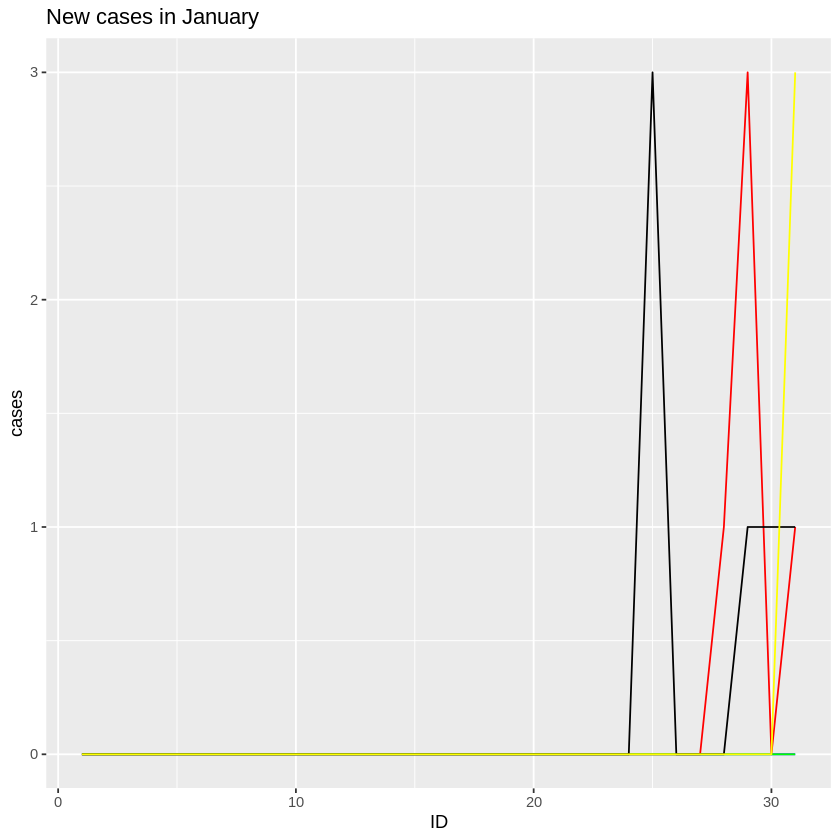

In [12]:
ggplot() + 
  geom_line(data = CzechiaJan, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyJan, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenJan, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceJan, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyJan, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in January")


<h3>February</h3>
<p>In second part of February, situation has dramatically worsen in northern part of Italy due to cumulative spread of virus in ski areas infrastructure.<br>
Despite Germany's low cases, it has been the first coutry to accept government restrictions. From 26 Feb., swimming pools, gyms and libraries were closed, as well as events with large gatherings.<br>
No other countries had any restrictions in February.</p>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



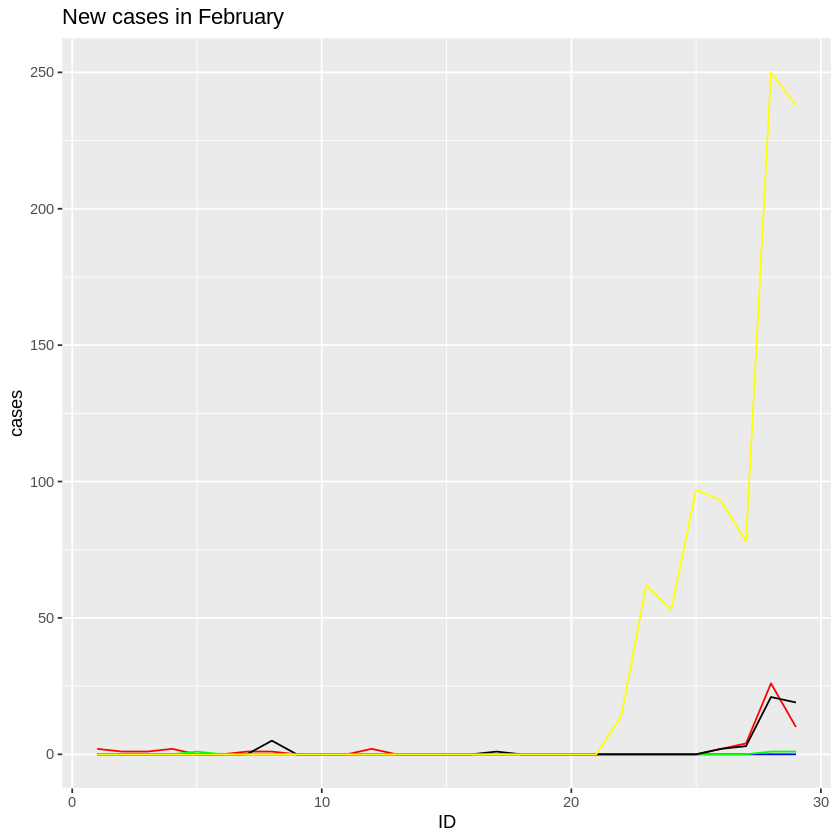

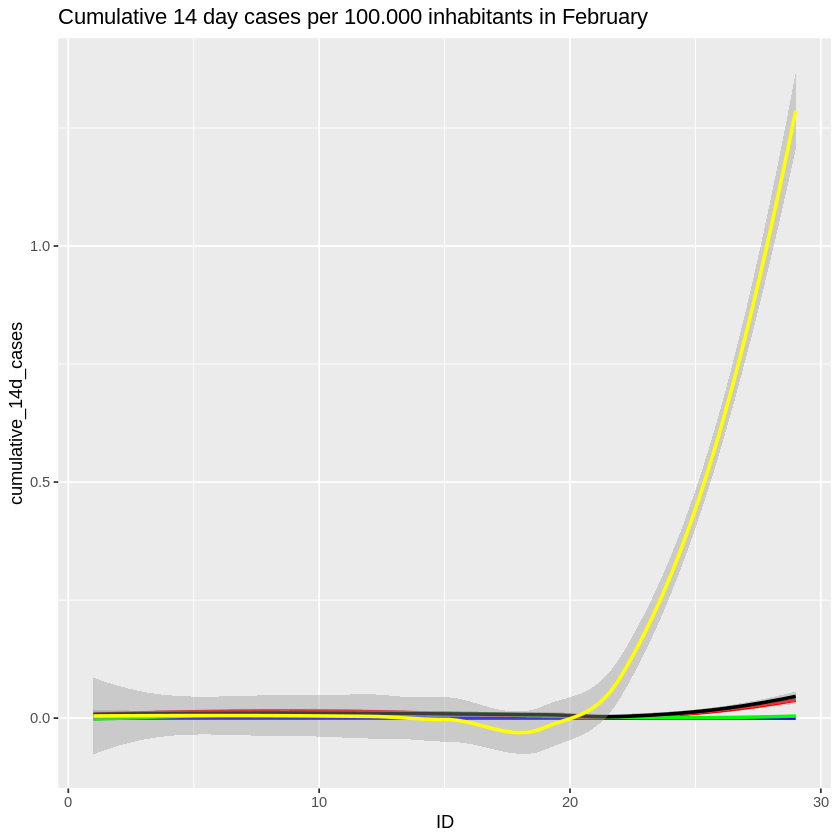

In [16]:

ggplot() + 
  geom_line(data = CzechiaFeb, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyFeb, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenFeb, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceFeb, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyFeb, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in February")

ggplot() + 
  geom_smooth(data = CzechiaFeb, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyFeb, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenFeb, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceFeb, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyFeb, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in February")


<h3>March</h3>
<p>Durig March, cases have been still rising in Italy, Germany and France<br>
In Italy, Czechia and France, complete lockdown has been in place since second week of March, while Germany has only limited gatherings and Sweeden did not accept any restrictions (see .pdf, explaining Swedish strategy). Czechia has been the first country to make masks mandatory. At the beginning critisized, soon followed by most countries across the world.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



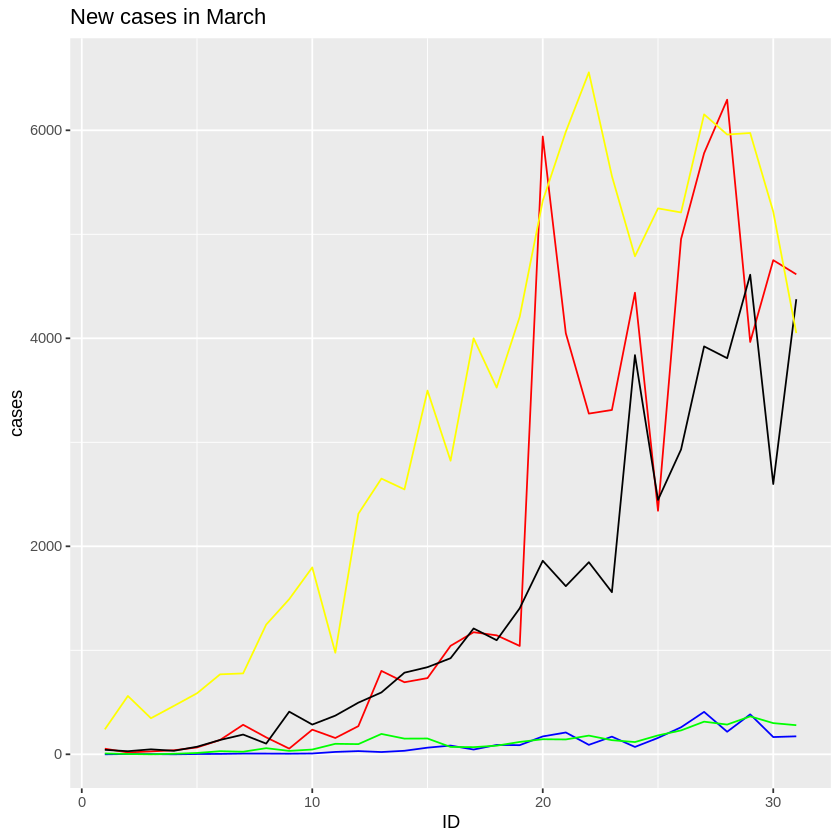

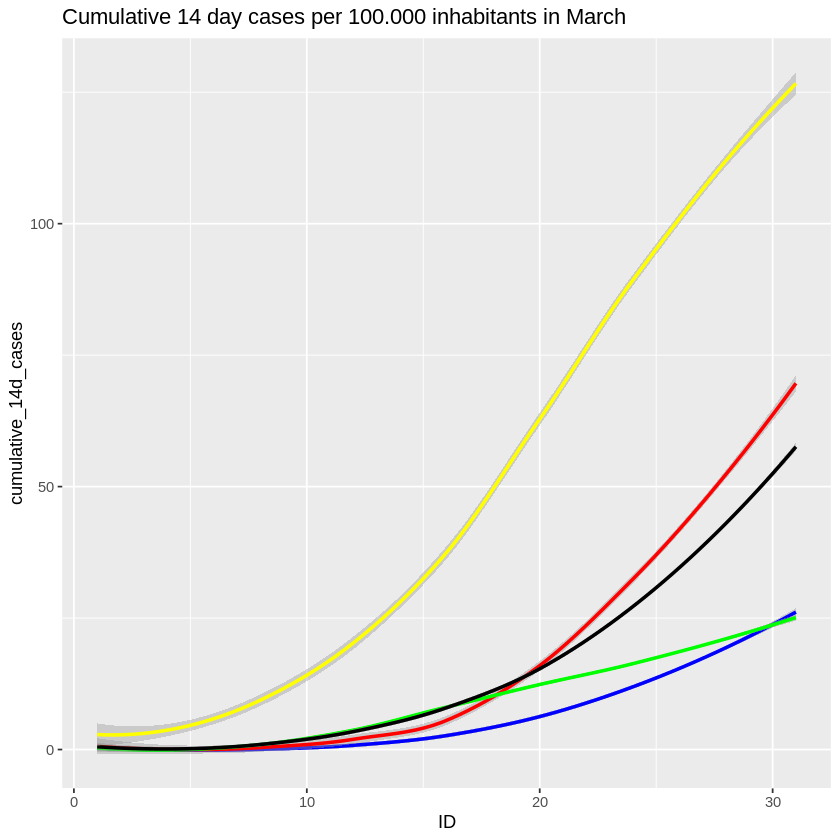

In [18]:
 ggplot() + 
  geom_line(data = CzechiaMar, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyMar, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenMar, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceMar, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyMar, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in March")

 ggplot() + 
  geom_smooth(data = CzechiaMar, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyMar, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenMar, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceMar, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyMar, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in March")


<h3>April</h3>
<p>In April, situation has became better in all countries, except of Sweden. While lockdown in Italy, France, Czechia and rough restrictions in Germany have flatten the curve and active cases began to decrease, Swedish "individual responsibility" strategy influenced large increases of cases during April. Swedish government is critisized, but claims that their strategy (not necessairly saving all lives) is the only feasible one in long term.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



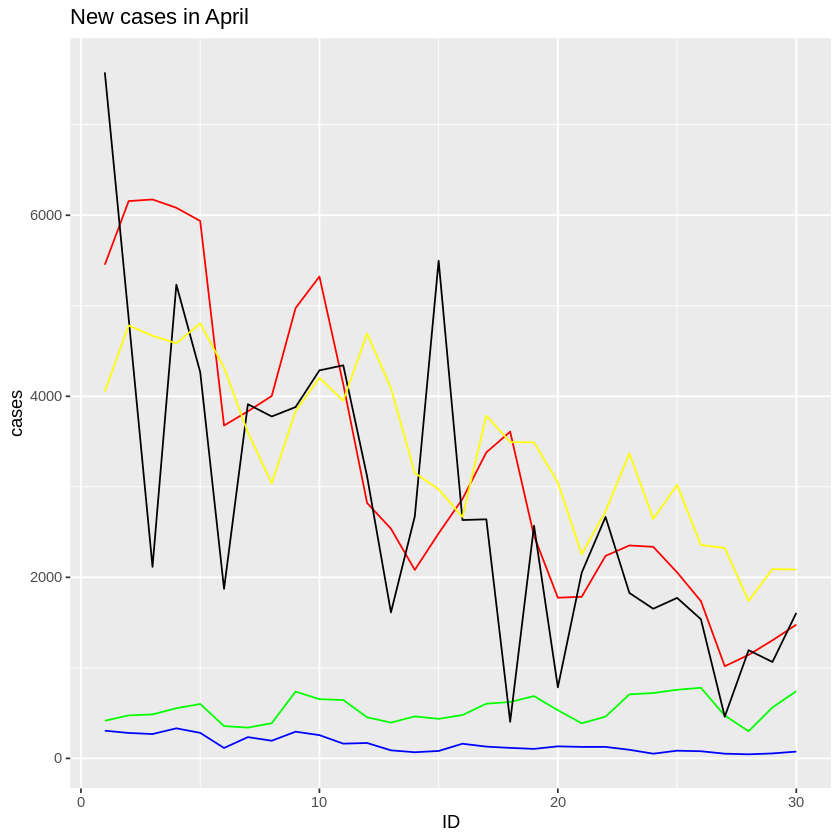

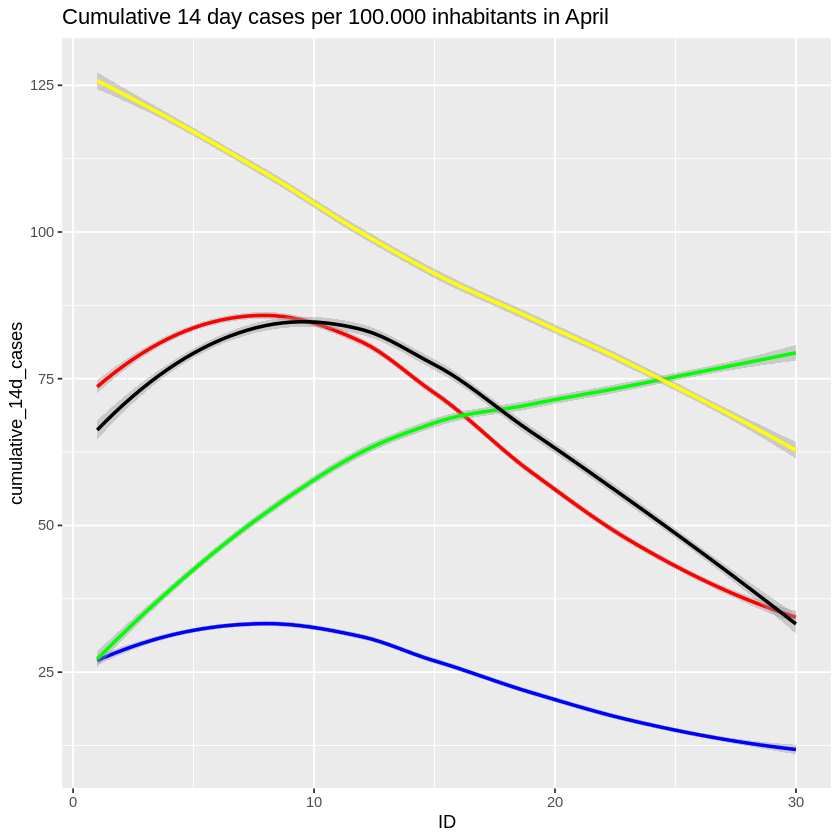

In [21]:
  ggplot() + 
  geom_line(data = CzechiaApr, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyApr, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenApr, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceApr, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyApr, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in April")

 ggplot() + 
  geom_smooth(data = CzechiaApr, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyApr, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenApr, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceApr, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyApr, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in April")

<h3>May</h3>
<p>Besides high number of new cases in France in certain days, situation in all countries has become better in May and countries started to reopen economy and school. Except of Czechia, where schools remained closed. Masks in indoor spaces, limited gatherings and distancing were the main restrictions, which succesfully lead all countries throughout the whole summer.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



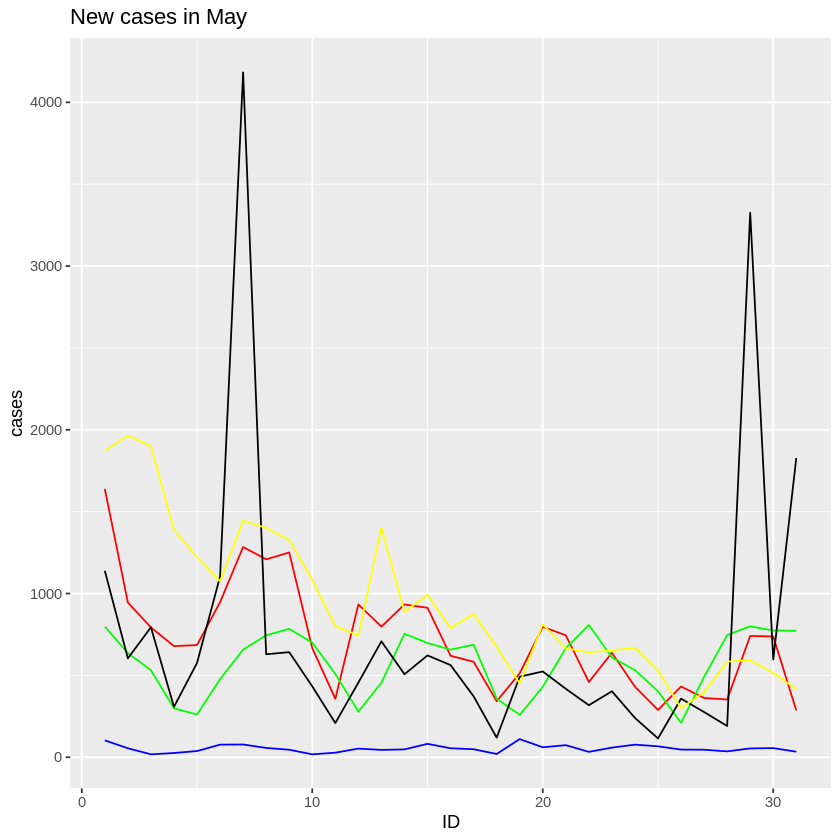

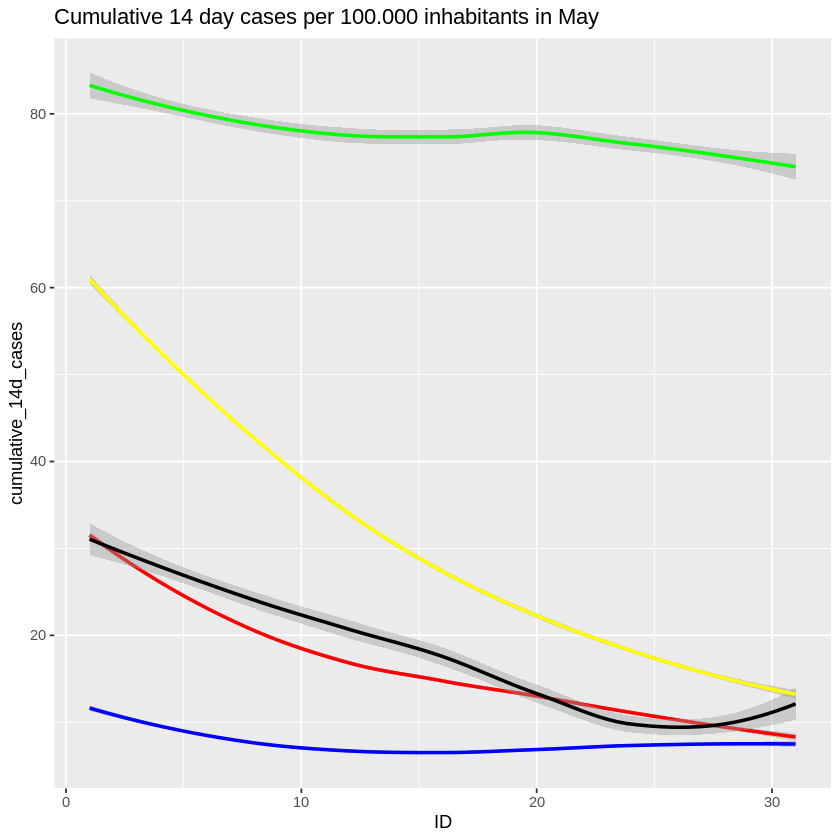

In [24]:
  ggplot() + 
  geom_line(data = CzechiaMay, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyMay, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenMay, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceMay, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyMay, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in May")

 ggplot() + 
  geom_smooth(data = CzechiaMay, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyMay, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenMay, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceMay, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyMay, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in May")

In [25]:
install.packages("anchors")
library(anchors)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘rgenoud’


Loading required package: rgenoud

##  rgenoud (Version 5.8-3.0, Build Date: 2019-01-22)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



##  anchors (Version 3.0-8, Build Date: 2014-02-24)
##  See http://wand.stanford.edu/anchors for additional documentation and support.





In [32]:
  #FranceJun "replacing incorrect neagtive values of new cases fo June"
  #ItalyJun
  #FranceJun <- replace.value(FranceJun, 3, from=-766, 766, verbose = FALSE)
  #ItalyJun <- replace.value(ItalyJun, 3, from=-148, 148, verbose = FALSE)
  #FranceJun <- replace.value(FranceJun, 3, from=81, 723, verbose = FALSE)

ID,dateRep,cases,deaths,country,popData2019,cumulative_14d_cases,month
<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<chr>
1,1/6/2020,257,31,France,67012883,13.940603,06
2,2/6/2020,338,31,France,67012883,13.710796,06
3,3/6/2020,766,107,France,67012883,11.785793,06
4,4/6/2020,352,81,France,67012883,11.687305,06
5,5/6/2020,767,44,France,67012883,12.357325,06
6,6/6/2020,611,46,France,67012883,12.667713,06
7,7/6/2020,579,31,France,67012883,13.173586,06
8,8/6/2020,343,13,France,67012883,13.513819,06
9,9/6/2020,211,54,France,67012883,13.294459,06


<h3>June</h3>
<p>Situation in all countries except of has been under control due to minimal, but useful mentioned restrictions. Sweden refused any restrictions, cumulative cases have been much higher in other countries, resulting in more unnecessary deaths, but Sedish government is still convinced they do the right thing.<br>
By the end of June, cases in Czechia started to grow as the government lifted mandatory masks restriction everywhere, including in indoors spaces.</p>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



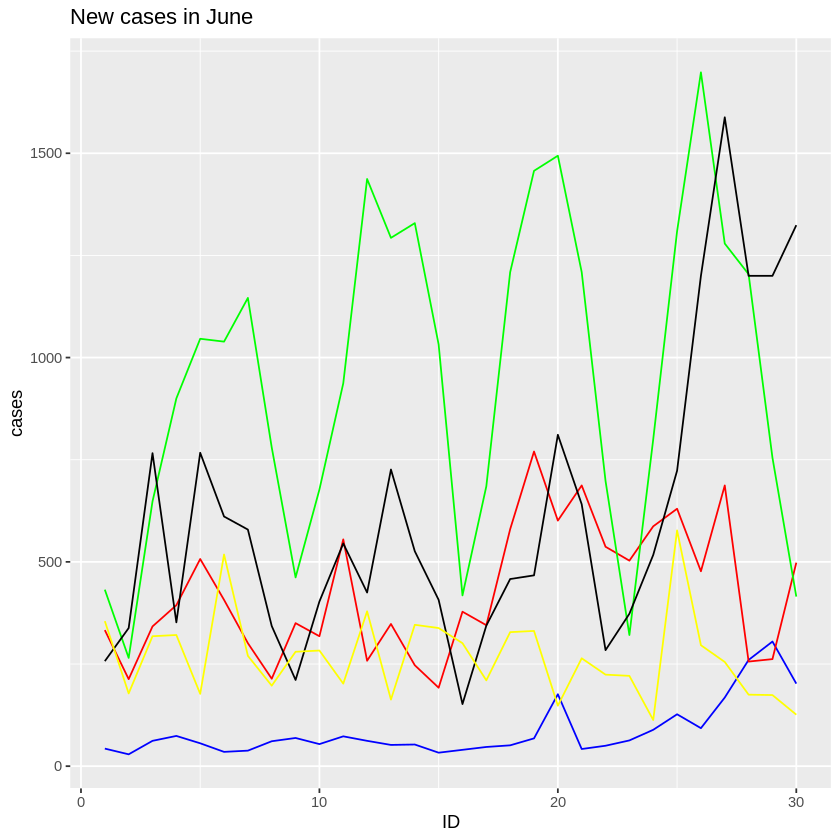

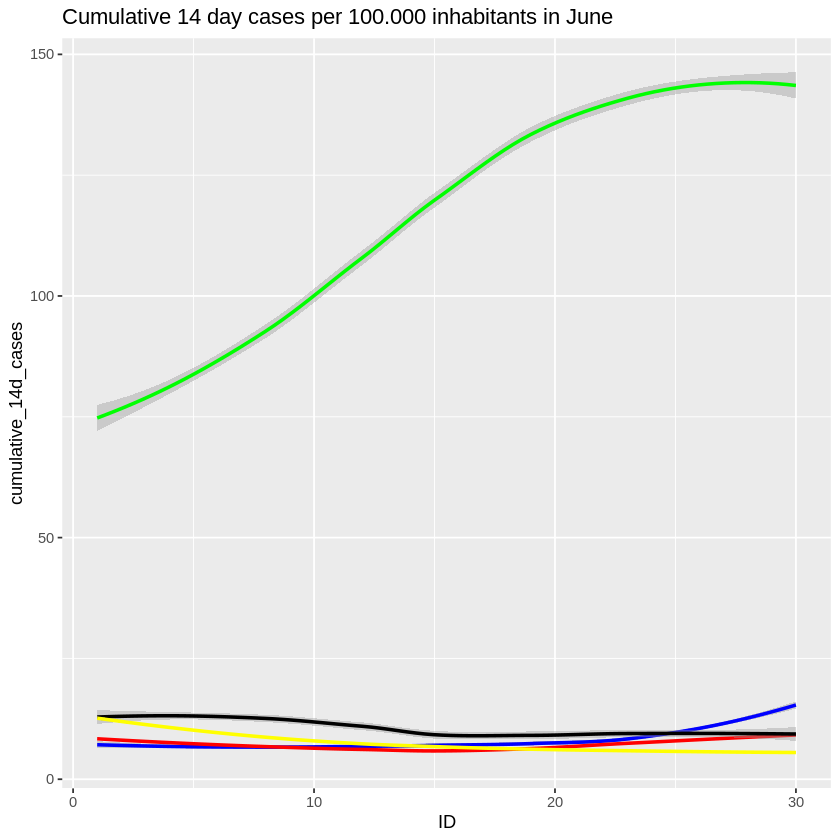

In [33]:
  ggplot() + 
  geom_line(data = CzechiaJun, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyJun, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenJun, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceJun, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyJun, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in June")

 ggplot() + 
  geom_smooth(data = CzechiaJun, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyJun, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenJun, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceJun, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyJun, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in June")

<h3>July</h3>
<p>Situation has been stable in every country throughout the whole month. Swedish cases got lower with end of school year, pointing out presence of students in schools without masks leads to high virus transmission.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



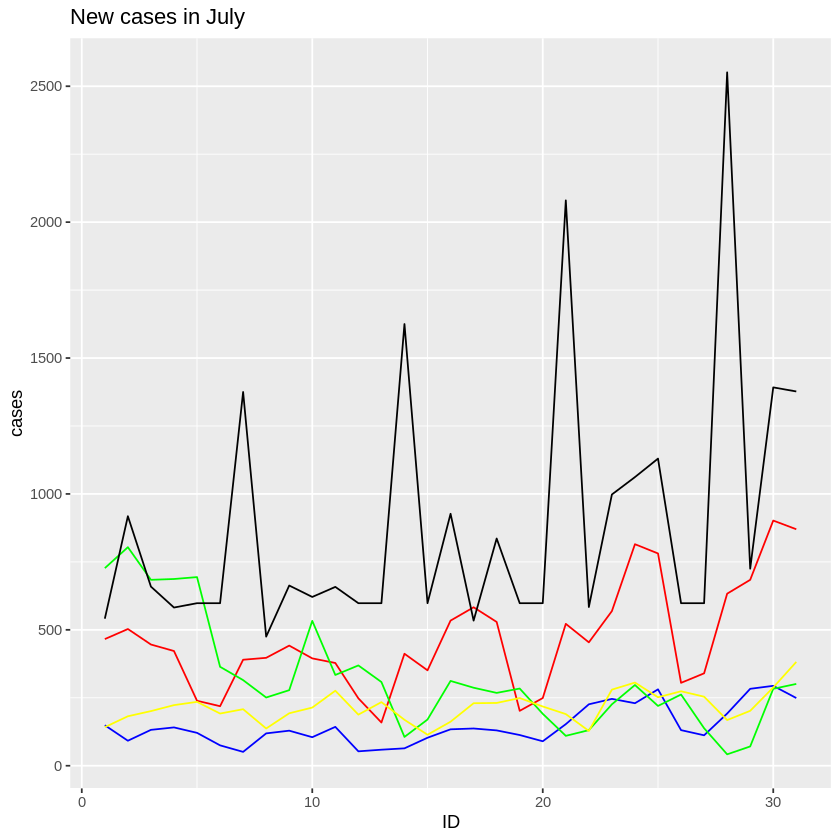

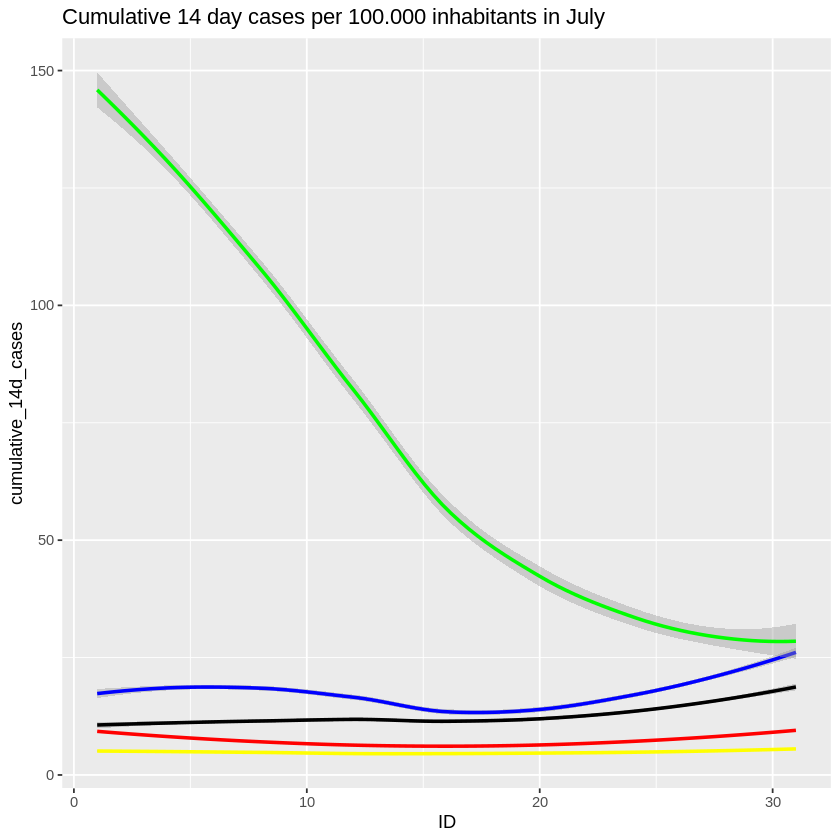

In [36]:

  ggplot() + 
  geom_line(data = CzechiaJul, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyJul, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenJul, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceJul, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyJul, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in July")

 ggplot() + 
  geom_smooth(data = CzechiaJul, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyJul, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenJul, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceJul, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyJul, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in July")

<h3>August</h3>
<p>During August, situation everywhere has been quite stable, except of France. We can see high rise of new cases in France. It was mainly caused by holiday season. French estaurants and bars have been open for tourists, which lead to increase of cases. France Made masks mandatory everywhere by the end of the month, with restaurants for pickup only.<br>
We can also see slight increase of cases in Czechia, which is caused by masks not being mandatory at all and open bars.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



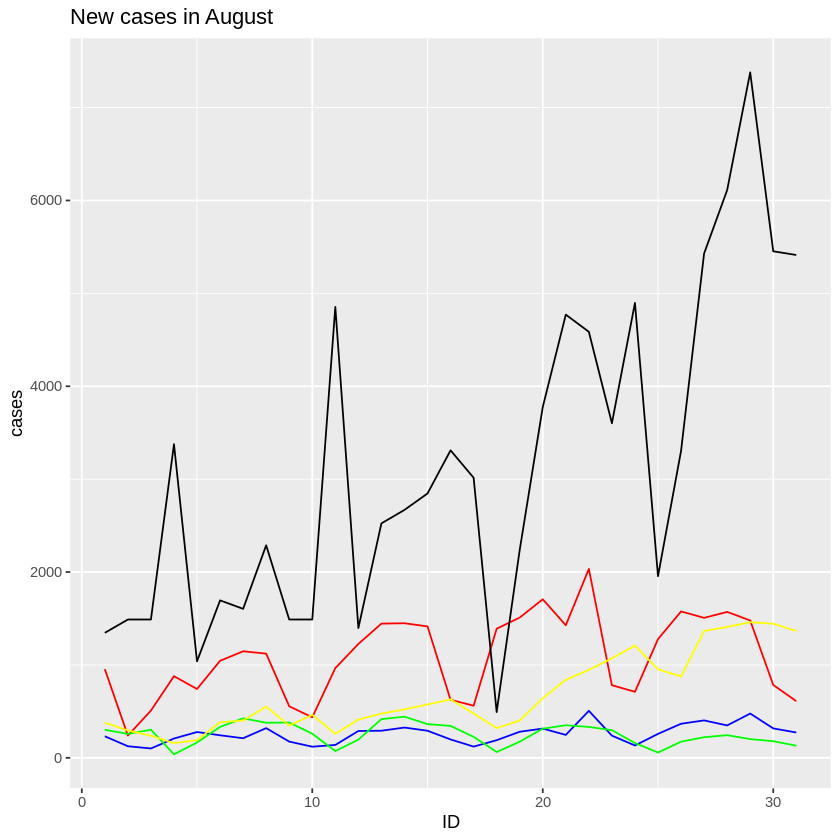

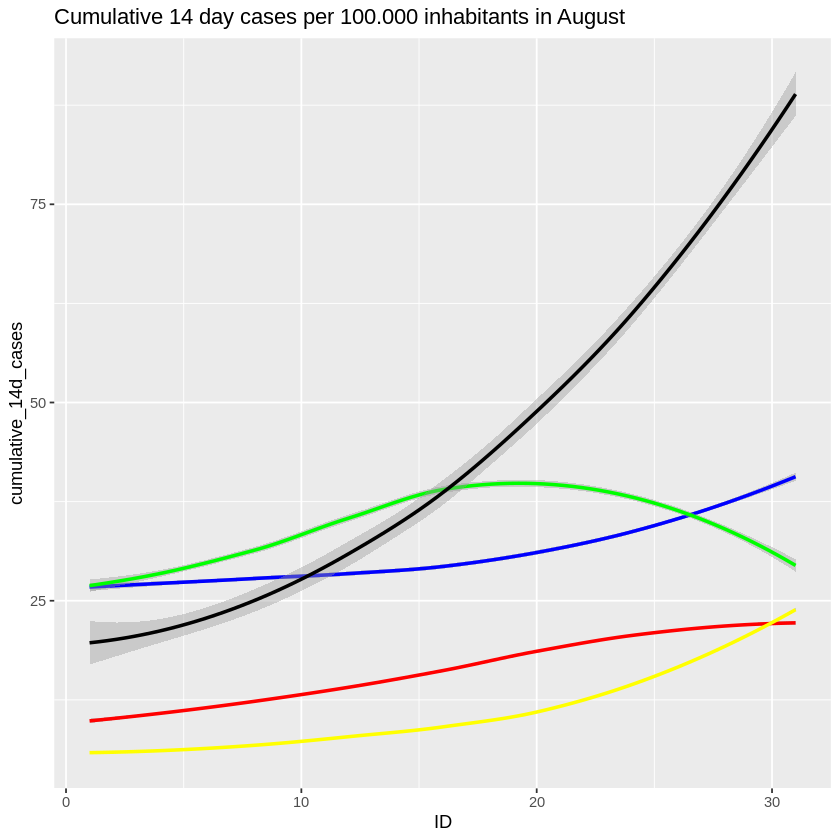

In [38]:

  ggplot() + 
  geom_line(data = CzechiaAug, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyAug, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenAug, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceAug, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyAug, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in August")

 ggplot() + 
  geom_smooth(data = CzechiaAug, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyAug, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenAug, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceAug, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyAug, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in August")

<h3>September</h3>
<p>While Sweden cases decline, cases in France and Czechia continue to rise dramatically. Cases in Italy and France grow in moderate rate.<br>
In France, restrictions made later in August have flattened the curve and growth of cases is slowing down; hovewer, Czechia let students to go to school without mandatory wearing of masks. Masks became mandatory there on September 10 in shops, while still not mandatory at school. This lead to dramatical growth of cases late in September and midway through October.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



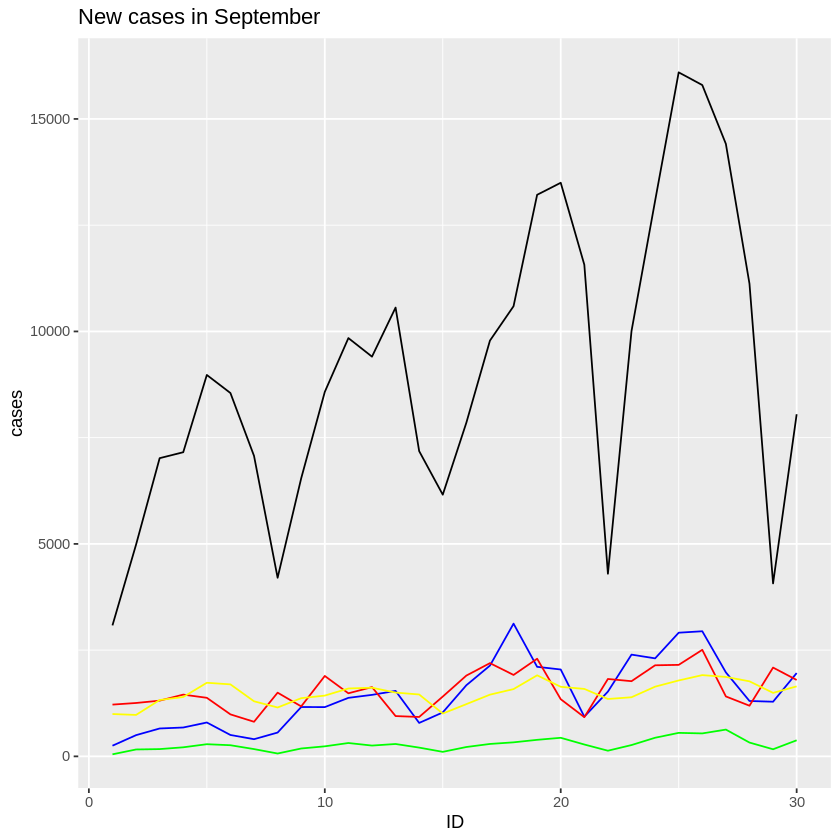

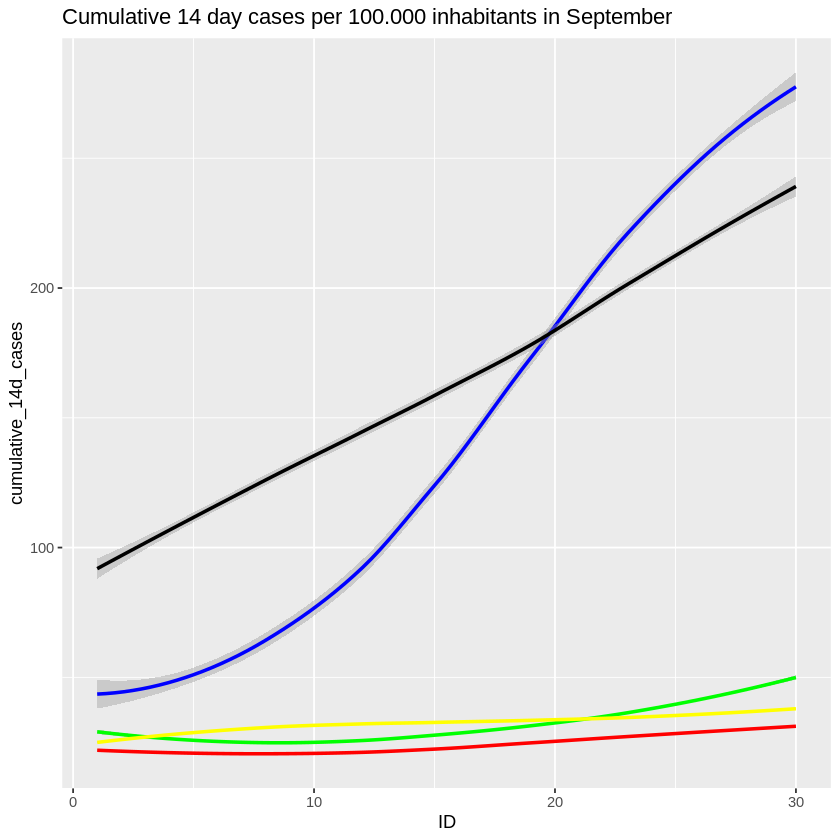

In [39]:
ggplot() + 
  geom_line(data = CzechiaSep, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanySep, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenSep, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceSep, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalySep, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in September")

 ggplot() + 
  geom_smooth(data = CzechiaSep, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanySep, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenSep, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceSep, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalySep, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in September")

<h3>October</h3>
<p>All countries have much higher rate of cumulative cases per capita, covid-19 cases rise a lot everywhere.<br>
Czechia imposed a lockdown and closed schools at the beginning of October, which flattened the curve in second half of October.<br>
Lockdown from September in France flattened the curve as well. Even though cases in France continue to rise, the rate of new cases is slower.<br>
Cases in Italy, Germany and Sweden start to rise again, mainly do to presence of students at schools. Masks are, however, mandatory in those countries.</p>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



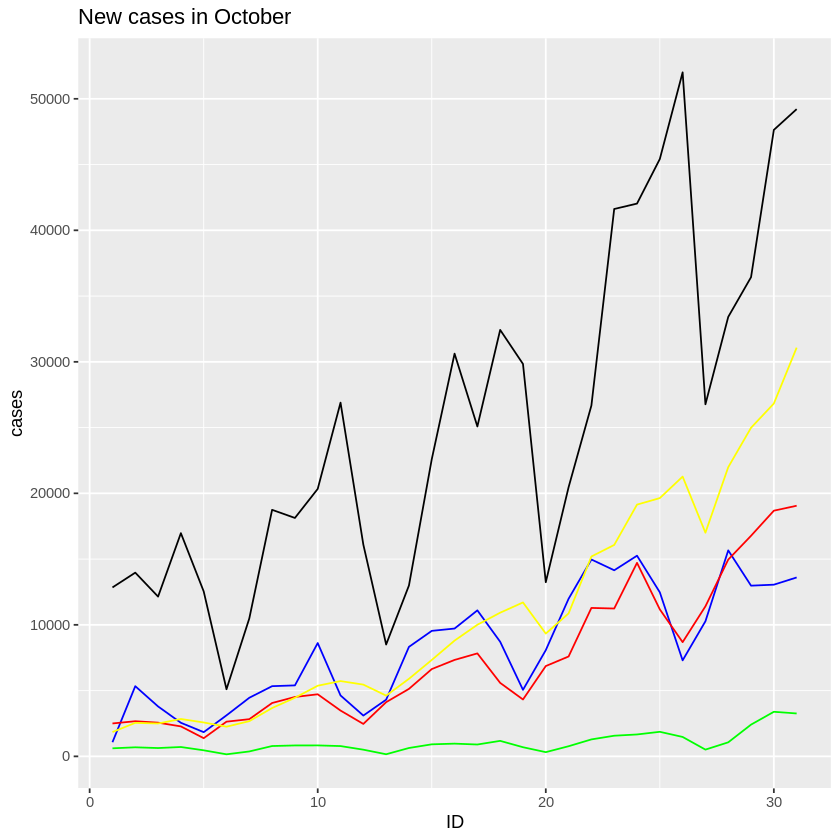

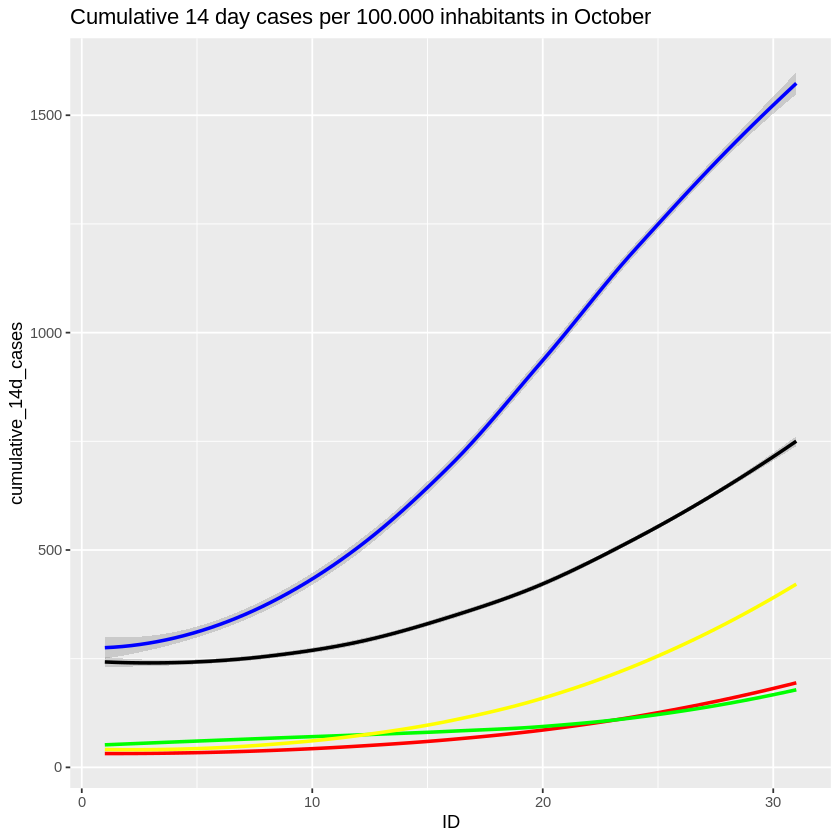

In [40]:
ggplot() + 
  geom_line(data = CzechiaOct, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyOct, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenOct, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceOct, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyOct, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in October")

 ggplot() + 
  geom_smooth(data = CzechiaOct, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyOct, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenOct, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceOct, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyOct, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in October")
 

<h3>November</h3>
<p>During November, Cases in France and Czechia began to decline as a result of lowckdown in September and October.<br>
Italy and Germany limited gatherings in the middle of October and closed gyms and swimming pools. Germany also closed restaurants and bars. We can see results of these restrictions 3 weeks later as total active cases decline, starting in the middle of November.<br>
Cases in Sweden continu to rise as schools are open are masks are not mandatory.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



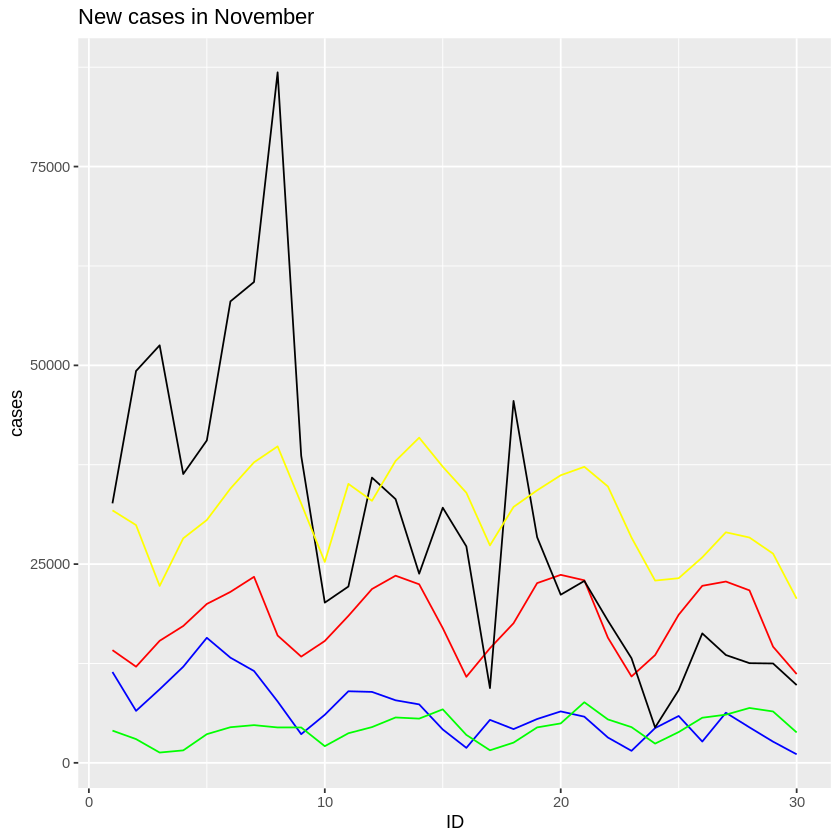

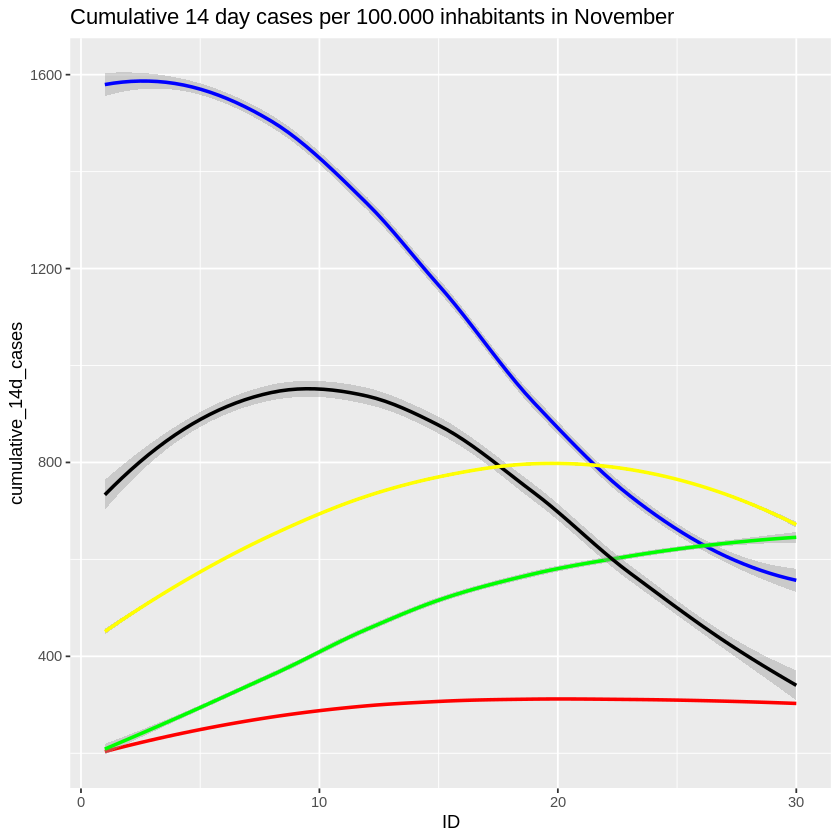

In [90]:
ggplot() + 
  geom_line(data = CzechiaNov, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyNov, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenNov, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceNov, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyNov, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in November")

 ggplot() + 
  geom_smooth(data = CzechiaNov, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyNov, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenNov, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceNov, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyNov, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in November")

In [46]:
#CzechiaDec <- CzechiaDec[-1,] "Need to remove last December day from 2019 from our dataset"
#GermanyDec <- GermanyDec[-1,]
#FranceDec <- FranceDec[-1,]
#ItalyDec <- ItalyDec[-1,]
#SwedenDec <- SwedenDec[-1,]

<h3>December</h3>
<p>During first days of December, we can observe that all countries have the situation under control.<br>
Swedish cases continue to rise steadily, but so far the rate has not been dramatical.<br>
By the end of November, Swedish government had to limit sport events and gatherings, because hospitals were full, especially in northern part of the country.</p>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



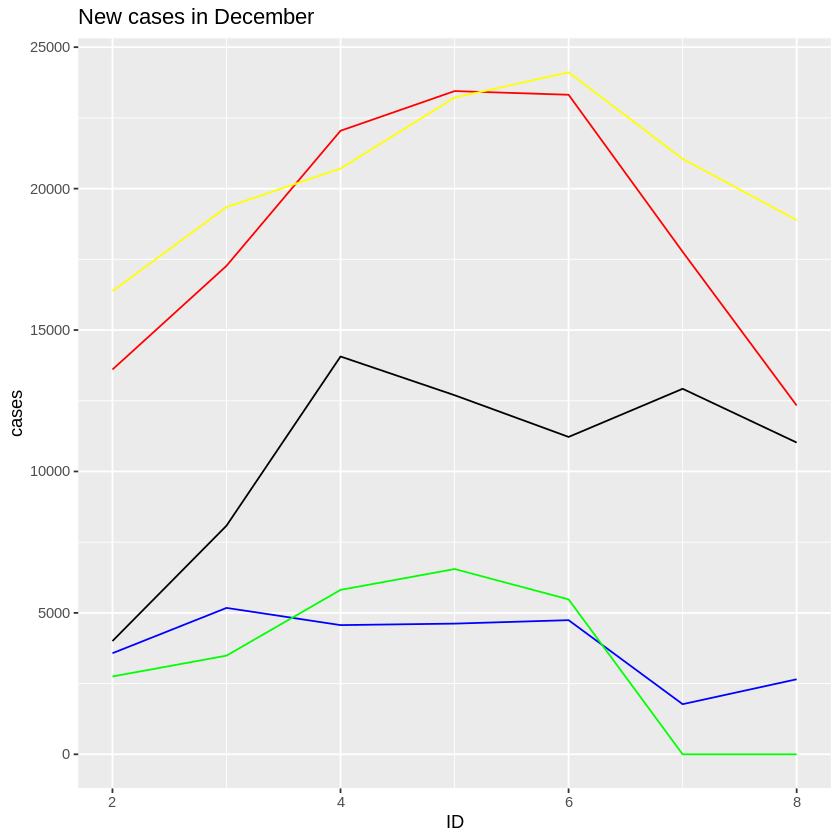

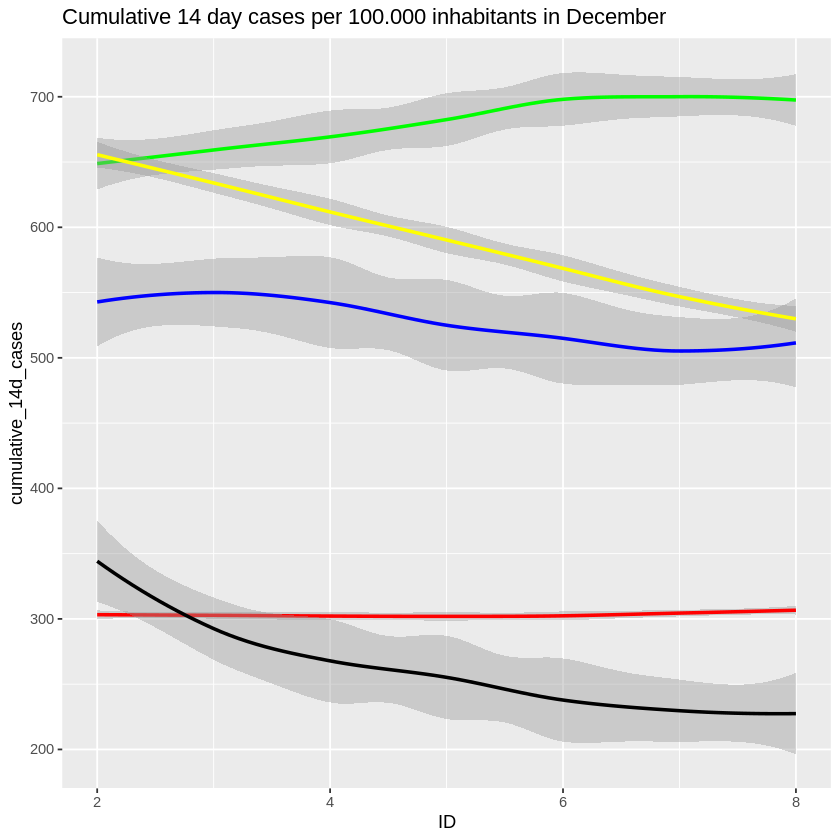

In [89]:
ggplot() + 
  geom_line(data = CzechiaDec, aes(x = ID, y = cases, group=1), color = "blue") +
  geom_line(data = GermanyDec, aes(x = ID, y = cases, group=1), color = "red") +
  geom_line(data = SwedenDec, aes(x = ID, y = cases, group=1), color = "green") +
  geom_line(data = FranceDec, aes(x = ID, y = cases, group=1), color = "black") +
  geom_line(data = ItalyDec, aes(x = ID, y = cases, group=1), color = "yellow") +
  ggtitle("New cases in December")

 ggplot() + 
  geom_smooth(data = CzechiaDec, aes(x = ID, y = cumulative_14d_cases, group=1), color = "blue") +
  geom_smooth(data = GermanyDec, aes(x = ID, y = cumulative_14d_cases, group=1), color = "red") +
  geom_smooth(data = SwedenDec, aes(x = ID, y = cumulative_14d_cases, group=1), color = "green") +
  geom_smooth(data = FranceDec, aes(x = ID, y = cumulative_14d_cases, group=1), color = "black") +
  geom_smooth(data = ItalyDec, aes(x = ID, y = cumulative_14d_cases, group=1), color = "yellow") +
  ggtitle("Cumulative 14 day cases per 100.000 inhabitants in December")


<p>Below is the total number of people who died with Covid-19.<br>
This data is not too usefull as it does not reflect on deaths per capita.<br>
Also, different governments use different approaches when counting who actually died from covid-19</p>

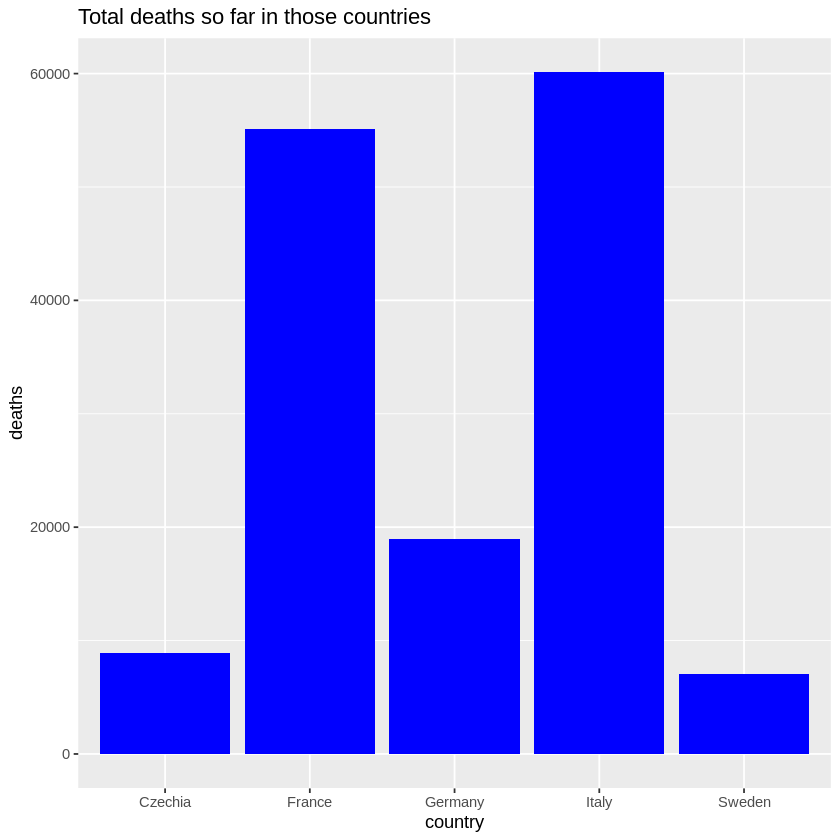

In [64]:
ggplot(data, aes(country, deaths)) + 
       geom_bar( stat = "identity", fill="blue") +
          ggtitle("Total deaths so far in those countries")+
           scale_fill_manual(values = colors)

In [71]:
#install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
mydata<-tbl_df(data)
mydata<-mydata%>%
  mutate(deaths_by_percentage=deaths/popData2019)

dateRep,cases,deaths,country,popData2019,cumulative_14d_cases,month,deaths_by_percentage
<chr>,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>
31/12/2019,0,0,Sweden,10230185,NA,12,0
1/1/2020,0,0,Sweden,10230185,NA,01,0
2/1/2020,0,0,Sweden,10230185,NA,01,0
3/1/2020,0,0,Sweden,10230185,NA,01,0
4/1/2020,0,0,Sweden,10230185,NA,01,0
5/1/2020,0,0,Sweden,10230185,NA,01,0
6/1/2020,0,0,Sweden,10230185,NA,01,0
7/1/2020,0,0,Sweden,10230185,NA,01,0
8/1/2020,0,0,Sweden,10230185,NA,01,0


In [88]:
Czechia <- filter(data, country=="Czechia")
Germany <- filter(data, country=="Germany")
France <- filter(data, country=="France")
Italy <- filter(data, country=="Italy")
Sweden <- filter(data, country=="Sweden")


<h3>Death rate by positive cases</h3>
<p> More useful is to know what was the death rate from positive cases in each country.<br>
As we can see, the death rate is higher in Italy. That is caused by the spring large number of cases in northern part of italy. Hospitals were full and capacity of ventilators was not satisfactory, leading to worse care and significantly larger death rate.<br>
Similarly, Germany never had too many cases during short period of time, leading to smaller death rate.<br>
Concerning Czechia, we have to be aware of the fact that many people are dying now as a result of high number of cases in late October and November, so the death rate will become significantly higher compared to current numbers.

In [87]:
Cze_deaths_by_cases <- sum(Czechia$deaths)/sum(Czechia$cases)
Cze_deaths_by_cases
Ger_deaths_by_cases <- sum(Germany$deaths)/sum(Germany$cases)
Ger_deaths_by_cases
Fra_deaths_by_cases <- sum(France$deaths)/sum(France$cases)
Fra_deaths_by_cases
Ita_deaths_by_cases <- sum(Italy$deaths)/sum(Italy$cases)
Ita_deaths_by_cases
Swe_deaths_by_cases <- sum(Sweden$deaths)/sum(Sweden$cases)
Swe_deaths_by_cases

[1] 0.01627919

[1] 0.01598356

[1] 0.02405892

[1] 0.0347497

[1] 0.02533774

<h3>Predictions for spread of the virus with no restrictions (Ablation)</h3>
<p> It is very hard to predict what would happen if countries did not accept any restrictions<br>
As we can observe from spread of the virus in Italy during late February and early March, number of new positive cases doubled approximately every 3 days.<br>
This would mean that with current number of new cases, after k days we would have approximatel curr_nr_of_cases*1.26^k daily new cases after k days. With This rate of growth, the whole population of Italy would get Covid within 2.5 months without restrictions, starting with 1 active case.<br>
However, this situation is unrealistic as the whole system would collapse. Healthcare would not be available for anyone and infrastructure in the whole country would collapse very quickly.<br>
Therefore, at some point during that process, people would probably stay home by their own judgement, leading to slowering the spread of virus.

<h3>Observations and Conclusion come in separated Conclusion.pdf file<h3>

